In [2]:
import numpy as np
import pandas as pd


In [3]:
data=pd.read_csv('/content/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
x=data.iloc[:,[3,4]]

In [6]:
import matplotlib.pyplot as plt

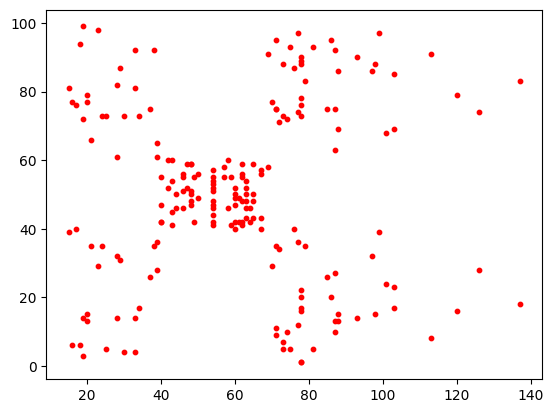

In [7]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],s=10,c='r')
plt.show()

In [8]:
from sklearn.cluster import KMeans

In [10]:
wcss=[]
for i in range(1,16):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans=kmeans.fit(x)
  wcss.append(kmeans.inertia_)

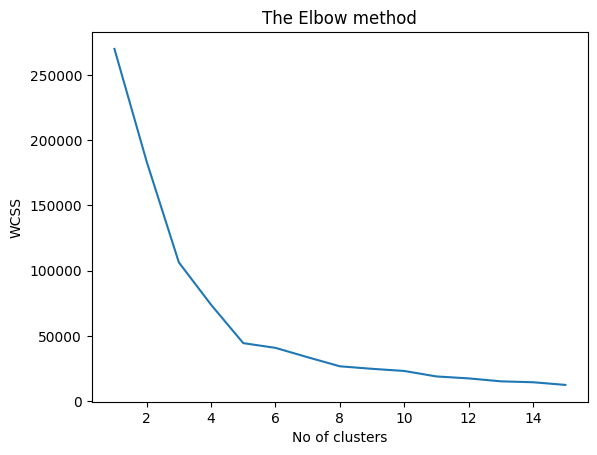

In [11]:
plt.plot(range(1,16),wcss)
plt.title('The Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('WCSS')
plt.show()

In [12]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(x)

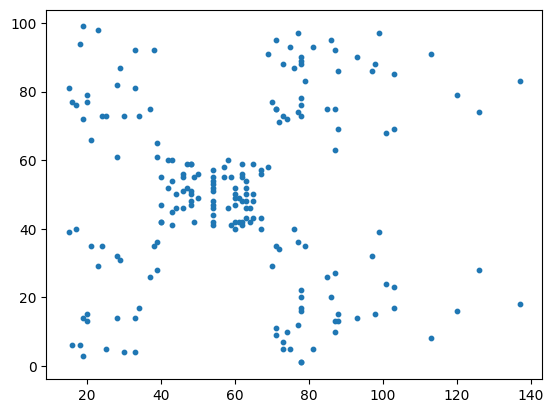

In [15]:
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],s=10)
plt.show()

In [16]:
from sklearn.cluster import DBSCAN

In [17]:
dbs=DBSCAN(eps=5,min_samples=5)

In [18]:
y_dbs=dbs.fit_predict(x)
# no of clusters

In [19]:
np.unique(y_dbs)

array([-1,  0,  1,  2,  3,  4])

In [20]:
x_copy=x.copy()

In [21]:
x_copy.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [22]:
x_copy['Cluster']=y_dbs

In [23]:
x_copy.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,15,39,-1
1,15,81,0
2,16,6,-1
3,16,77,0
4,17,40,-1


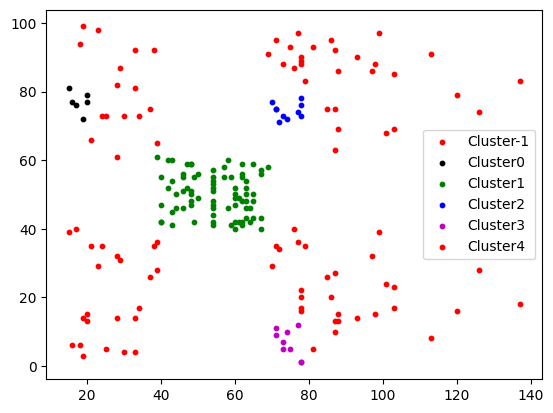

In [24]:
colors=['black','green','blue','m','r']
for i in range(-1,5):
  cluster_data=x_copy[y_dbs==i]
  plt.scatter(cluster_data['Annual Income (k$)'],cluster_data['Spending Score (1-100)'],s=10,c=colors[i],label=f'Cluster{i}')
plt.legend()
plt.show()